In [29]:
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from pprint import pprint
import numpy as np

In [4]:
si = pd.read_csv("SuicideRate_HDI.csv")
income = pd.read_csv("WorldPPPCleaned.csv")
income

,Unnamed: 0,Country,U.S. dollars
0,0,Afghanistan,171.87
1,1,Albania,493.90
2,2,Argentina,514.35
3,3,Armenia,248.63
4,4,Austria,4753.41
...,...,...,...
59,59,United Kingdom,3189.75
60,60,United States,4502.19
61,61,Uruguay,879.92
62,62,Viet Nam,296.18


In [5]:
si

,Unnamed: 0,country,suicides_no,population,Suicide rate,HDI for year
0,0,Lithuania,608.0,2794885,0.000218,0.878919
1,1,Slovenia,368.0,2102419,0.000175,0.910715
2,2,Estonia,210.0,1329522,0.000158,0.890523
3,3,Latvia,298.0,1900449,0.000157,0.869134
4,4,Serbia,895.0,6899126,0.000130,0.803060
5,5,Iceland,47.0,366463,0.000128,0.956801
6,6,Australia,3139.0,25655289,0.000122,0.944670
7,7,Austria,1072.0,8916864,0.000120,0.912505
8,8,Czechia,1224.0,10697858,0.000114,0.890991
9,9,Kazakhstan,2144.0,18755666,0.000114,0.812130


In [16]:
income = income[["Country", "U.S. dollars"]]
income = income.rename(columns={"Country": "country"})
income

,country,U.S. dollars
0,Afghanistan,171.87
1,Albania,493.90
2,Argentina,514.35
3,Armenia,248.63
4,Austria,4753.41
...,...,...
59,United Kingdom,3189.75
60,United States,4502.19
61,Uruguay,879.92
62,Viet Nam,296.18


In [68]:
si = si[["country", "suicides_no", "population", "Suicide rate", "HDI for year"]]
si.loc[20,"country"] = "United States"
si

,country,suicides_no,population,Suicide rate,HDI for year
0,Lithuania,608.0,2794885,0.000218,0.878919
1,Slovenia,368.0,2102419,0.000175,0.910715
2,Estonia,210.0,1329522,0.000158,0.890523
3,Latvia,298.0,1900449,0.000157,0.869134
4,Serbia,895.0,6899126,0.000130,0.803060
5,Iceland,47.0,366463,0.000128,0.956801
6,Australia,3139.0,25655289,0.000122,0.944670
7,Austria,1072.0,8916864,0.000120,0.912505
8,Czechia,1224.0,10697858,0.000114,0.890991
9,Kazakhstan,2144.0,18755666,0.000114,0.812130


In [114]:
comparison = pd.merge(si, income, on="country", how="left")
comparison = comparison.dropna()
comparison = comparison.reset_index(drop=True)
comparison

,country,suicides_no,population,Suicide rate,HDI for year,U.S. dollars
0,Lithuania,608.0,2794885,0.000218,0.878919,1494.70
1,Slovenia,368.0,2102419,0.000175,0.910715,2621.78
2,Estonia,210.0,1329522,0.000158,0.890523,2193.45
3,Latvia,298.0,1900449,0.000157,0.869134,1671.16
4,Austria,1072.0,8916864,0.000120,0.912505,4753.41
5,Czechia,1224.0,10697858,0.000114,0.890991,1659.91
6,Kazakhstan,2144.0,18755666,0.000114,0.812130,515.80
7,Netherlands,1824.0,17441500,0.000105,0.937978,5200.11
8,Germany,7766.0,83160871,0.000093,0.943043,5189.62
9,Spain,4369.0,47365655,0.000092,0.896214,3000.21


# Plotting the relationship between the income level of a country and its suicide rate

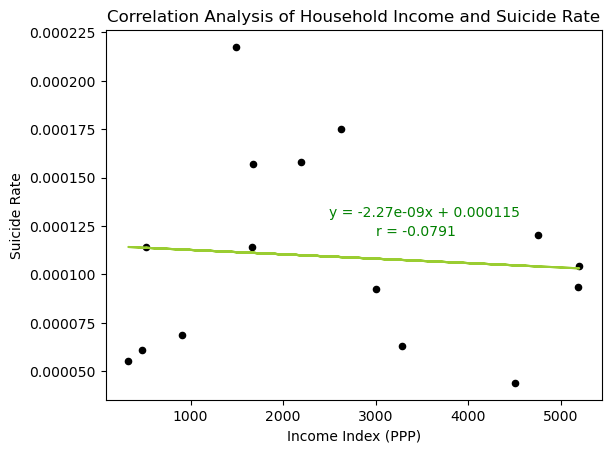

In [169]:
comparison.plot(kind="scatter", x="U.S. dollars", y="Suicide rate", xlabel="Income Index (PPP)", ylabel="Suicide Rate", color="black")
x = comparison["U.S. dollars"]
y = comparison["Suicide rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
reg = x * slope + intercept
plt.plot(x, reg, color="yellowgreen")
plt.annotate(f"y = {round(slope, 11)}x + {round(intercept, 6)}", (2500, 0.00013), color="green")
plt.annotate(f"r = {round(rvalue,4)}", (3000, 0.00012), color="green")
plt.title("Correlation Analysis of Household Income and Suicide Rate")
plt.savefig("IncomeSiCorrelation.png")
plt.show()

In [140]:
xaxis = []
for i in range(15):
    xaxis.append(i)  
xaxis

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

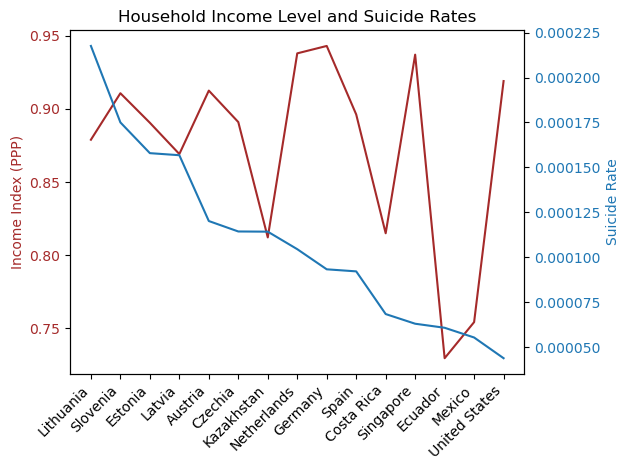

In [168]:
fig, fig1 = plt.subplots()
fig1.plot(comparison["HDI for year"], color="brown")
fig2 = fig1.twinx()
fig2.plot(comparison["Suicide rate"])

fig1.set_xticks(xaxis)
fig1.set_xticklabels(comparison["country"], rotation=45, horizontalalignment = "right")
fig1.xaxis.set_label_coords(-0.5,0)

fig1.set_ylabel("Income Index (PPP)", color="brown")
fig1.tick_params(axis="y", labelcolor="brown")

fig2.set_ylabel("Suicide Rate", color="#1f77b4")
fig2.tick_params(axis="y", labelcolor="#1f77b4")

plt.title("Household Income Level and Suicide Rates")
fig.tight_layout()
plt.savefig("IncomeSI.png")
plt.show()